In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Overview

In [2]:
# read data
df = pd.read_json('planning.json')
df.tail()

,id,originalId,talentId,talentName,talentGrade,bookingGrade,operatingUnit,officeCity,officePostalCode,jobManagerName,jobManagerId,totalHours,startDate,endDate,clientName,clientId,industry,isUnassigned,requiredSkills,optionalSkills
9995,9996,bbaa10a3,tln_7350,Martina Dippel,Manager,,Operating Unit 8,Altötting,42828,Ullrich Renner,tln_9067,32,09/24/2022 07:50 PM,09/28/2022 07:50 PM,Rust,cl_100,Film,False,"[{'name': 'TypeScript', 'category': 'Coding La...","[{'name': 'C++', 'category': 'Coding Language'}]"
9996,9997,45500dca,tln_7793,Arnim Barkholz-Austermühle,Intern,,Operating Unit 6,Rochlitz,93218,Gunda Carsten,tln_9112,36,12/23/2022 11:35 AM,12/27/2022 11:35 PM,Rust,cl_100,Film,False,"[{'name': 'English', 'category': 'Language'}, ...","[{'name': 'C++', 'category': 'Coding Language'}]"
9997,9998,55361b66,,,,Associate,Operating Unit 9,Ravensburg,96235,Dipl.-Ing. Bianca Rust MBA.,tln_7613,26,06/05/2022 08:29 AM,06/08/2022 02:29 PM,Rust,cl_100,Film,True,"[{'name': 'R', 'category': 'Coding Language'}]","[{'name': 'English', 'category': 'Language'}]"
9998,9999,a90fecb2,,,,Senior Manager,Operating Unit 3,Saarlouis,23579,Prof. Yasemin Hänel,tln_5069,29,11/21/2022 05:23 AM,11/24/2022 08:23 PM,Rust,cl_100,Film,True,"[{'name': 'Python', 'category': 'Coding Langua...","[{'name': 'Scala', 'category': 'Coding Languag..."
9999,10000,fd5b4f18,,,,Associate,Operating Unit 7,Meißen,53443,Sergej Matthäi,tln_9782,25,05/26/2022 12:12 AM,05/29/2022 03:12 AM,Rust,cl_100,Film,True,[],"[{'name': 'R', 'category': 'Coding Language'}]"


In [3]:
# check types
df.dtypes

id                   int64
originalId          object
talentId            object
talentName          object
talentGrade         object
bookingGrade        object
operatingUnit       object
officeCity          object
officePostalCode     int64
jobManagerName      object
jobManagerId        object
totalHours           int64
startDate           object
endDate             object
clientName          object
clientId            object
industry            object
isUnassigned          bool
requiredSkills      object
optionalSkills      object
dtype: object

In [4]:
# check interesting values (only numerical)
df.describe()

,id,officePostalCode,totalHours
count,10000.00000,10000.000000,10000.000000
mean,5000.50000,50180.137600,24.029900
std,2886.89568,29901.202555,9.200884
min,1.00000,130.000000,8.000000
25%,2500.75000,23233.000000,16.000000
50%,5000.50000,50773.000000,24.000000
75%,7500.25000,75898.000000,32.000000
max,10000.00000,99833.000000,40.000000


In [5]:
# replace empty entries with nan
df = df.replace(r'^\s*$', np.nan, regex=True)

In [6]:
# check nan values
df.isna().sum()

id                     0
originalId             0
talentId            2030
talentName          2030
talentGrade         2030
bookingGrade        7970
operatingUnit          0
officeCity             0
officePostalCode       0
jobManagerName         0
jobManagerId           0
totalHours             0
startDate              0
endDate                0
clientName             0
clientId               0
industry               0
isUnassigned           0
requiredSkills         0
optionalSkills         0
dtype: int64

## In-depth statistics

In [7]:
# get column for in-depth statistics
bg = df.bookingGrade
bg

0                  NaN
1       Lead Associate
2                  NaN
3                  NaN
4                  NaN
             ...      
9995               NaN
9996               NaN
9997         Associate
9998    Senior Manager
9999         Associate
Name: bookingGrade, Length: 10000, dtype: object

In [8]:
# see the different values including their count (without nan values)
bg.value_counts()

Manager             361
Senior Manager      359
Lead Associate      345
Intern              327
Associate           325
Senior Associate    313
Name: bookingGrade, dtype: int64

<AxesSubplot:>

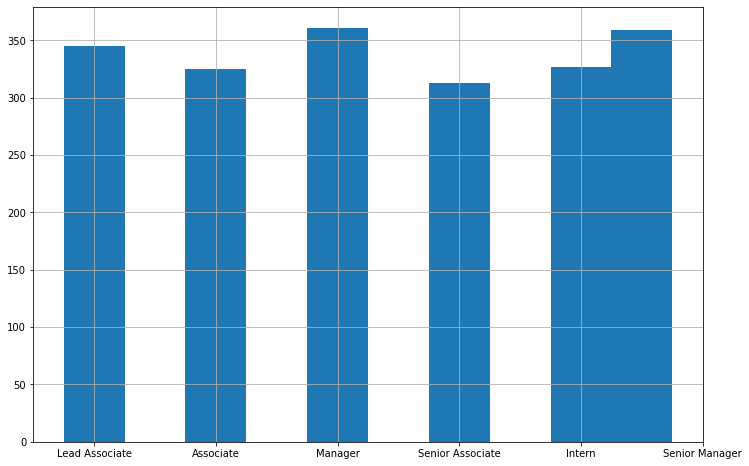

In [9]:
# histogram
bg.hist(figsize=(12,8),align='left')

## Noteworthy

There are a lot of nan values for the booking grade (as seen in Overview -> check nan values).